In [27]:
import numpy as np

In [28]:
import pandas as pd

In [29]:
import matplotlib.pyplot as plt

In [30]:
import seaborn as sns

In [33]:
df=pd.read_csv("zomato.csv")

In [36]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [37]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [57]:
df.drop(['phone', 'dish_liked', 'reviews_list', 'menu_item'], axis=1, inplace=True ,errors= 'ignore')



In [58]:
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '', regex=False)
)

df['approx_cost(for two people)'] = pd.to_numeric(
    df['approx_cost(for two people)'], errors='coerce'
)


In [59]:
df.dropna(subset=['rate'], inplace=True)


In [60]:
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '', regex=False)
)

df['approx_cost(for two people)'] = pd.to_numeric(
    df['approx_cost(for two people)'],
    errors='coerce'
)
df.dropna(subset=['approx_cost(for two people)'], inplace=True)



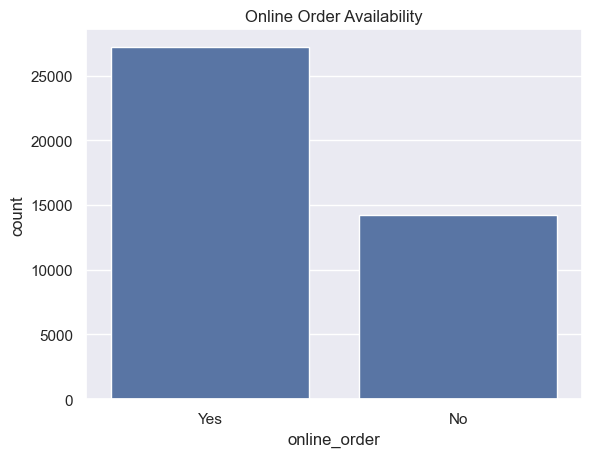

In [61]:
#Online order Distribution
sns.countplot(x='online_order', data=df)
plt.title("Online Order Availability")
plt.show()


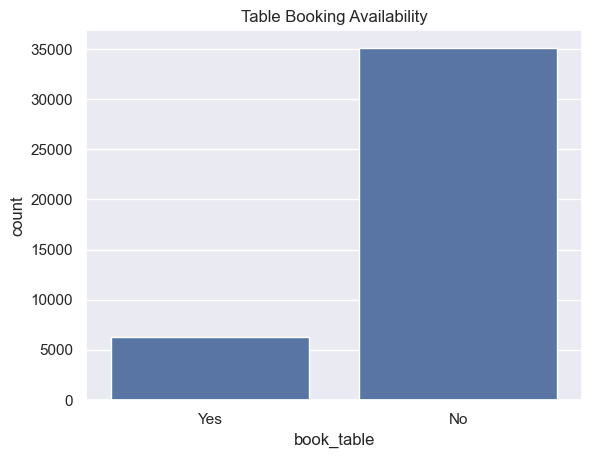

In [62]:
#TABLE BOOKING ANALYSIS

sns.countplot(x='book_table', data=df)
plt.title("Table Booking Availability")
plt.show()


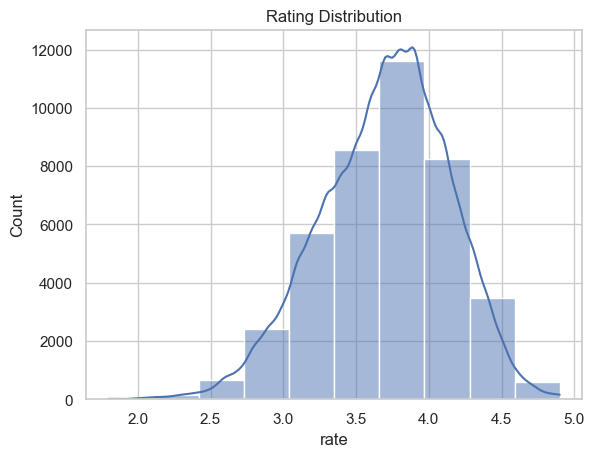

In [74]:
#RATING DISTRIBUTION
sns.histplot(df['rate'], bins=10, kde=True)
plt.title("Rating Distribution")
plt.show()



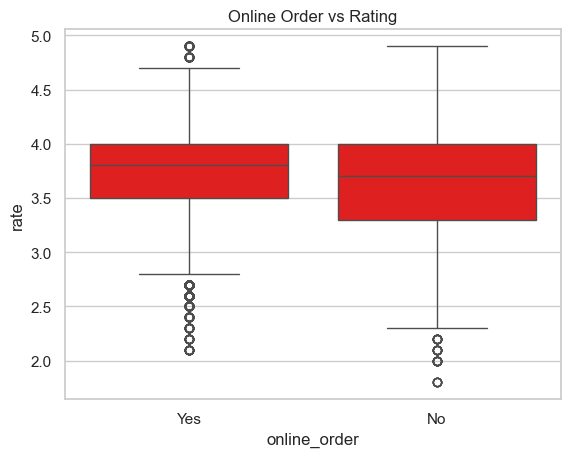

In [75]:
#ONLINE ORDER VS RATING 
sns.boxplot(x='online_order', y='rate', data=df, color='red')
plt.title("Online Order vs Rating")
plt.show()


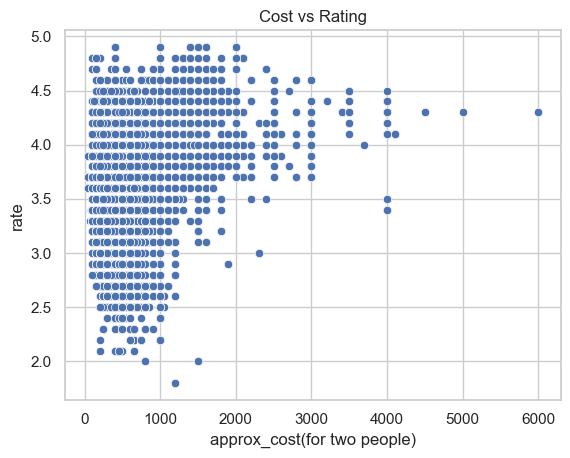

In [76]:
#COST VS RATING
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)
plt.title("Cost vs Rating")
plt.show()


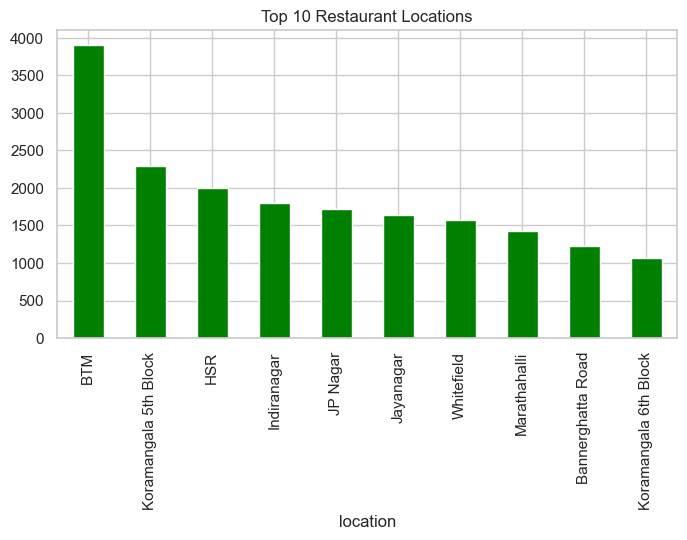

In [77]:
# TOP 10 LOCATIONS
df['location'].value_counts().head(10).plot(kind='bar', figsize=(8,4), color='green')
plt.title("Top 10 Restaurant Locations")
plt.show()


In [78]:
df['rate'] = (
    df['rate']
    .astype(str)
    .str.replace('/5', '', regex=False)
    .replace(['NEW', '-'], np.nan)
)

df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

df.dropna(subset=['rate'], inplace=True)

df.groupby('location')['rate'].mean().sort_values(ascending=False).head(10)


location
Lavelle Road             4.141788
Koramangala 3rd Block    4.020419
St. Marks Road           4.017201
Koramangala 5th Block    4.006661
Church Street            3.992125
Sankey Road              3.965385
Koramangala 4th Block    3.918668
Cunningham Road          3.901053
Residency Road           3.864570
Koramangala 7th Block    3.852986
Name: rate, dtype: float64

In [79]:
# MOST POPULA CUISINES
df['cuisines'].value_counts().head(10)


cuisines
North Indian                           2118
North Indian, Chinese                  1975
South Indian                           1232
Cafe                                    620
Bakery, Desserts                        613
Biryani                                 609
South Indian, North Indian, Chinese     561
Desserts                                545
Fast Food                               514
Chinese                                 410
Name: count, dtype: int64

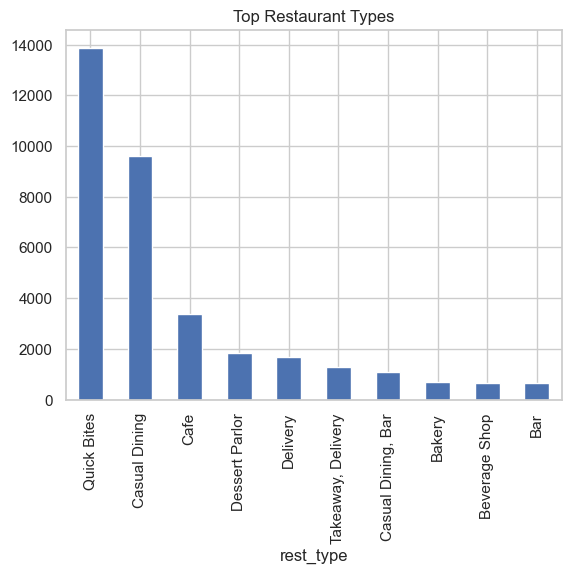

In [80]:
# RESTAURANT TYPE ANALYSIS
df['rest_type'].value_counts().head(10).plot(kind='bar')
sns.set_theme(style="darkgrid")
plt.title("Top Restaurant Types")
plt.show()
